In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

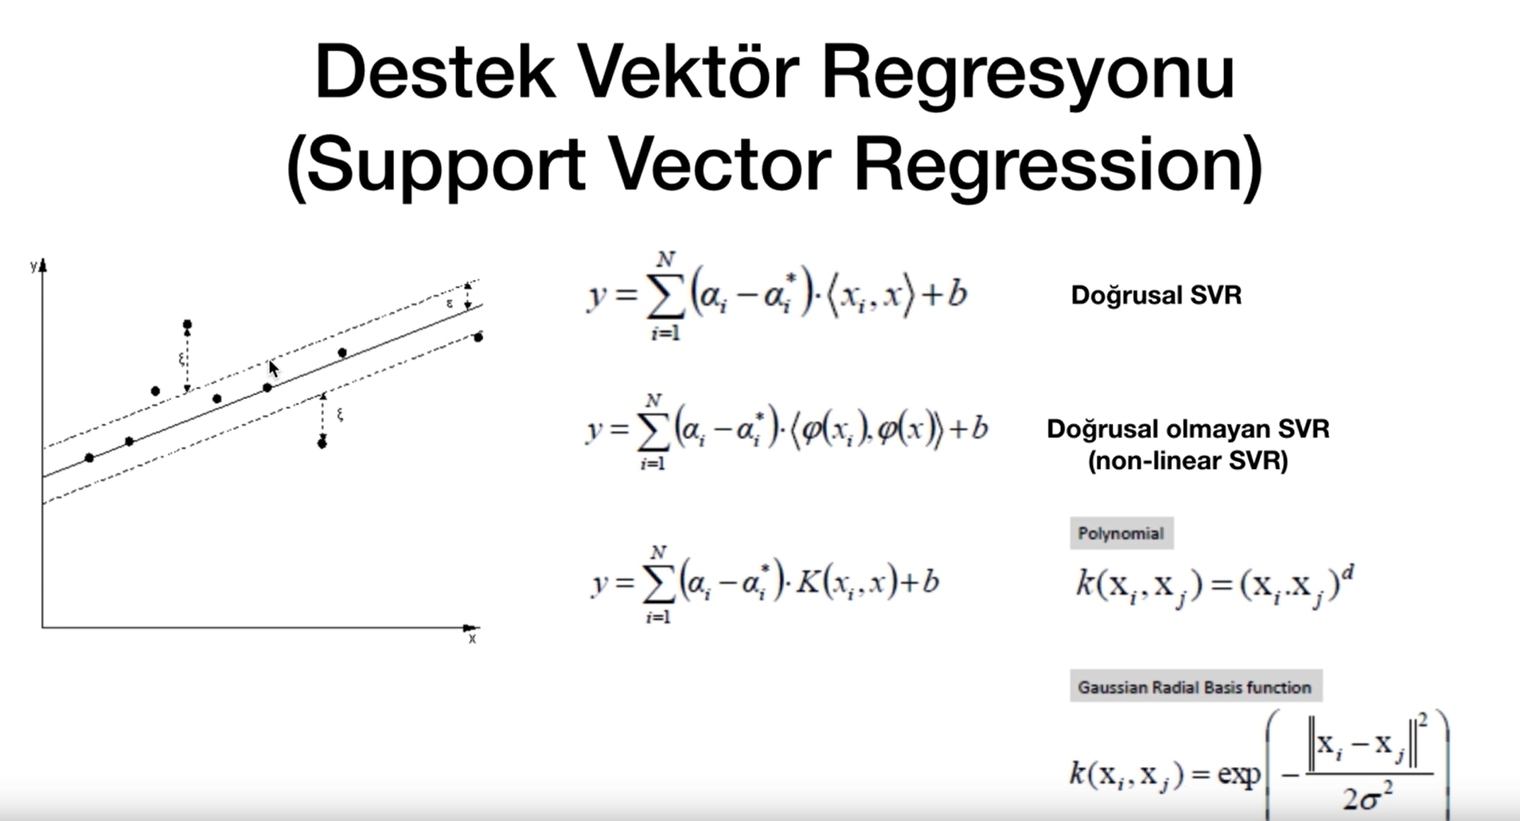

In [2]:
data = pd.read_pickle('maaslar.pkl')

In [3]:
data

,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500
5,Sef,6,7500
6,Mudur,7,10000
7,Direktor,8,15000
8,C-level,9,25000
9,CEO,10,50000


In [18]:
x = data.iloc[:, 1].values.reshape(-1, 1)
y = data.iloc[:,2:].values.reshape(-1, 1)

In [22]:
sc1 = StandardScaler()
x_train = sc1.fit_transform(x)

In [23]:
sc2 = StandardScaler()
x_test = sc2.fit_transform(y)

In [28]:
x_train.shape

(10, 1)

C:\Users\Asus\anaconda3\envs\notebook\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


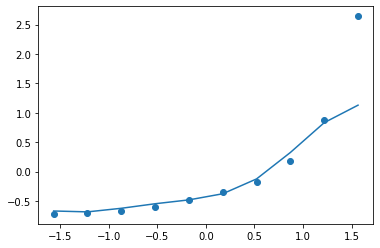

In [36]:
svr_reg = SVR(kernel = 'rbf', degree= 5, epsilon = 0.05)
svr_reg.fit(x_train, x_test)

plt.scatter(x_train, x_test)
plt.plot(x_train,svr_reg.predict(x_train))
plt.show()

###  gelecek tahmini için de deneme yapalım

In [38]:
svr_reg.predict([[12]])

array([0.00136884])

###  kernel'i poly olan bir svr modeli çizelim. hatta dereceyi de büyütelim overfit için koyduğumuz epsilonu falan sallayalım hayvan gibi ezberlesin

C:\Users\Asus\anaconda3\envs\notebook\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


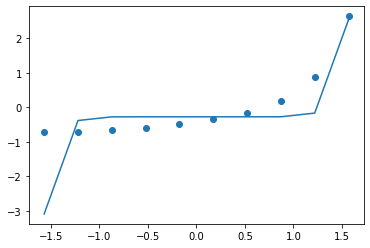

In [41]:
svr_reg = SVR(kernel = 'poly', degree= 13)
svr_reg.fit(x_train, x_test)

plt.scatter(x_train, x_test)
plt.plot(x_train,svr_reg.predict(x_train))
plt.show()

### poly kernele sahip, L2 Regularization'ı ve epsilon değerli ezberlemeyi elimizden geldiğince durdurmalık bir model kuralım

C:\Users\Asus\anaconda3\envs\notebook\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


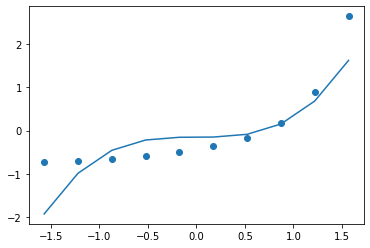

In [43]:
svr_reg = SVR(degree = 3, C=0.8, epsilon=0.2, kernel='poly') # C regularization parametresi
svr_reg.fit(x_train, x_test)

plt.scatter(x_train, x_test)
plt.plot(x_train,svr_reg.predict(x_train))
plt.show()

### Buradaki işlem bitti, yine de R^2, adjusted R^2, MAE, MAPE, MSE, RMSE üzerindeki erroları inceleyelim

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

X = normalized_data['Egitim Seviyesi']
y = normalized_data['maas']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)

In [49]:
x_train, x_test, y_train, y_test = train_test_split(normalized_data, y, train_size = 0.7, test_size = 0.3, random_state = 42)
svr_ols = SVR()
svr_ols.fit(x_train, y_train)

y_pred = svr_ols.predict(x_test)

In [50]:
# Automating backward elimination technique

def DoBackwardElimination(the_regressor, X, y, minP2eliminate):
    
    assert np.shape(X)[0] == np.shape(y)[0], 'Length of X and y do not match'
    assert minP2eliminate > 0, 'Minimum P value to eliminate cannot be zero or negative'
    
    original_list = list(range(0, np.shape(the_regressor.pvalues)[0]))
    
    max_p = 10        # Initializing with random value of maximum P value
    i = 0
    r2adjusted = []   # Will store R Square adjusted value for each loop
    r2 = []           # Will store R Square value  for each loop
    list_of_originallist = [] # Will store modified index of X at each loop
    classifiers_list = [] # fitted classifiers at each loop
    
    while max_p >= minP2eliminate:
        
        p_values = list(the_regressor.pvalues)
        r2adjusted.append(the_regressor.rsquared_adj)
        r2.append(the_regressor.rsquared)
        list_of_originallist.append(original_list)
        
        max_p = max(p_values)
        max_p_idx = p_values.index(max_p)
        
        if max_p_idx == 0:
            
            temp_p = set(p_values)
            
            # removing the largest element from temp list
            temp_p.remove(max(temp_p))
            
            max_p = max(temp_p)
            max_p_idx = p_values.index(max_p)
            
            print('Index value 0 found!! Next index value is {}'.format(max_p_idx))
            
            if max_p < minP2eliminate:
                
                print('Max P value found less than 0.1 with 0 index ...Loop Ends!!')
                
                break
                
        if max_p < minP2eliminate:
            
            print('Max P value found less than 0.1 without 0 index...Loop Ends!!')
            
            break
        
        val_at_idx = original_list[max_p_idx]
        
        idx_in_org_lst = original_list.index(val_at_idx)
        
        original_list.remove(val_at_idx)
        
        print('Popped column index out of original array is {} with P-Value {}'.format(val_at_idx, np.round(np.array(p_values)[max_p_idx], decimals= 4)))
        
        X_new = X[:, original_list]
        
        the_regressor = sm.OLS(endog = y, exog = X_new).fit()
        classifiers_list.append(the_regressor)
        
        print('==================================================================================================')
        
    return classifiers_list, r2, r2adjusted, list_of_originallist

In [51]:
regressor_SLR_OLS = sm.OLS(endog = y_train, exog = X_train).fit()

# Looking at the summary of regressor
print(regressor_SLR_OLS.summary())

                                 OLS Regression Results                                
Dep. Variable:                   maas   R-squared (uncentered):                   0.698
Model:                            OLS   Adj. R-squared (uncentered):              0.648
Method:                 Least Squares   F-statistic:                              13.86
Date:                Thu, 27 Jul 2023   Prob (F-statistic):                     0.00982
Time:                        21:05:21   Log-Likelihood:                         0.72163
No. Observations:                   7   AIC:                                     0.5567
Df Residuals:                       6   BIC:                                     0.5027
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

C:\Users\Asus\anaconda3\envs\notebook\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [52]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
#mape = mean_absolute_percentage_error(y_test, y_pred)

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)



Mean Absolute Error: 0.07460514213696234
Mean Square Error: 0.006332318638833538
Root Mean Square Error: 0.07957586718869948
